In [4]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
image = imread('./datas/ladybug.png')
image.shape

(533, 800, 3)

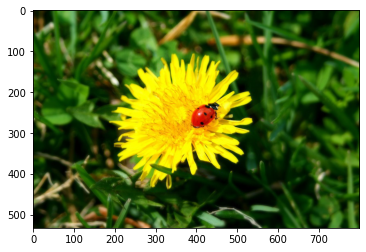

In [5]:
plt.imshow(image)

In [6]:
from sklearn.cluster import KMeans

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=13).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

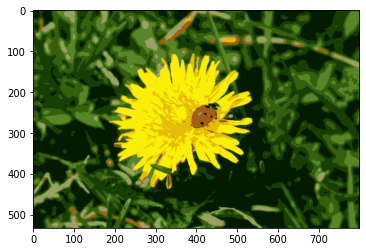

In [7]:
plt.imshow(segmented_img);

In [8]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=13).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

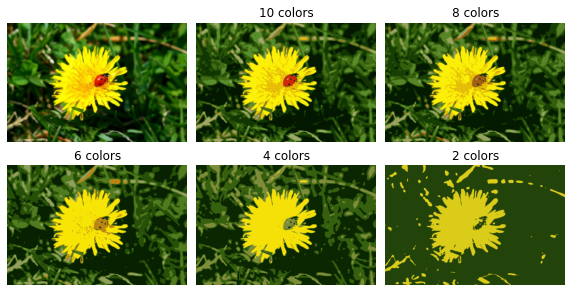

In [10]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{} colors'.format(n_clusters))
    plt.axis('off')
plt.show()

In [11]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_dig, y_dig = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_dig, y_dig, random_state=13)

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg= LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=13)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=13)

In [13]:
log_reg.score(X_test, y_test)

0.9622222222222222

In [16]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50, random_state=13)),
    ('log_reg', LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=13))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=13)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=13))])

In [17]:
pipeline.score(X_test, y_test)

0.9688888888888889

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

D ..............................kmeans__n_clusters=17; total time=   2.0s
[CV] END ..............................kmeans__n_clusters=18; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=18; total time=   2.2s
[CV] END ..............................kmeans__n_clusters=18; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=19; total time=   2.3s
[CV] END ..............................kmeans__n_clusters=19; total time=   2.4s
[CV] END ..............................kmeans__n_clusters=19; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=20; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=20; total time=   2.3s
[CV] END ..............................kmeans__n_clusters=20; total time=   2.3s
[CV] END ..............................kmeans__n_clusters=21; total time=   2.9s
[CV] END ..............................kmeans__n_clusters=21; total time=   2.4s
[CV] END ..........................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=13)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=13))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [19]:
grid_clf.best_params_

{'kmeans__n_clusters': 82}

In [20]:
grid_clf.score(X_test, y_test)

0.9733333333333334